In [1]:
include("/Users/meesvandartel/Desktop/Projects/LPR projects/FinGrowthABM_repo/GrowthBanks.jl")
using .GrowthBanks,Agents,Plots,HypothesisTests,ProgressMeter

┌ Warning: Agent type is not concrete. If your agent is parametrically typed, you're probably
│ seeing this warning because you gave `Agent` instead of `Agent{Float64}`
│ (for example) to this function. You can also create an instance of your agent
│ and pass it to this function. If you want to use `Union` types for mixed agent
│ models, you can silence this warning.
│ If you are using `ContinuousAgent{D}` as agent type in version 6+, update
│ to the new two-parameter version `ContinuousAgent{D,Float64}` to obtain
│ the same behavior as previous Agents.jl versions.
└ @ Agents ~/.julia/packages/Agents/WuWeG/src/core/model_validation.jl:15
Progress:   0%|▏                                        |  ETA: 0:09:24

RECAPPING BANK
-6.877091945847795
RECAPPING BANK
-47.56612625542159
RECAPPING BANK
-104.77707526001942
RECAPPING BANK
-85.2016803665423
RECAPPING BANK
-295.7214648357665
RECAPPING BANK
-29.183801450345285
RECAPPING BANK
-52.76511735115423
RECAPPING BANK
-81.95152887321426
RECAPPING BANK
-62.64609246376145
RECAPPING BANK
-114.31991553436029
RECAPPING BANK
-256.589281686378
RECAPPING BANK
-342.7543796996966
RECAPPING BANK
-251.7173082062842
RECAPPING BANK
-360.5115445053681
RECAPPING BANK
-320.9941720553058
RECAPPING BANK
-11.011856265674027
RECAPPING BANK
-12.417335189826218
RECAPPING BANK
-107.07505060698986
RECAPPING BANK
-69.30079907664158
RECAPPING BANK
-77.92413819725108
RECAPPING BANK
-109.91838882390705
RECAPPING BANK
-34.73632076187053
RECAPPING BANK
-615.1463521330504
RECAPPING BANK
-88.68591631697146
RECAPPING BANK
-1.1147260294484806
RECAPPING BANK
-0.3894160456444178
RECAPPING BANK
-31.878587806220388
RECAPPING BANK
-159.97580049785813
RECAPPING BANK
-98.746078526778
RECAPPI

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


-19.18930880468592
RECAPPING BANK
-19.189308804685915
RECAPPING BANK
-262.86806962194885
RECAPPING BANK
-19.18930880468592
RECAPPING BANK
-110.2507620532579
RECAPPING BANK
-173.6665017378128
RECAPPING BANK
-19.189308804685915
RECAPPING BANK
-19.18930880468592
RECAPPING BANK
-5.5401628387629245
RECAPPING BANK
-19.189308804685915
RECAPPING BANK
-19.18930880468592
RECAPPING BANK
-19.189308804685915
RECAPPING BANK
-19.18930880468592
RECAPPING BANK
-128.31676668167512
RECAPPING BANK
-19.189308804685915
RECAPPING BANK
-19.18930880468592
RECAPPING BANK
-82.95841320376894
RECAPPING BANK
-19.189308804685915
RECAPPING BANK
-86.11910180772858
RECAPPING BANK
-19.18930880468592
RECAPPING BANK
-203.31285881169003
RECAPPING BANK
-19.189308804685915
RECAPPING BANK
-19.18930880468592
RECAPPING BANK
-19.189308804685915
RECAPPING BANK
-19.18930880468592
RECAPPING BANK
-73.29355850091609
RECAPPING BANK
-19.189308804685915
RECAPPING BANK
-102.33893565401299
RECAPPING BANK
-37.826679658665434
RECAPPING BANK

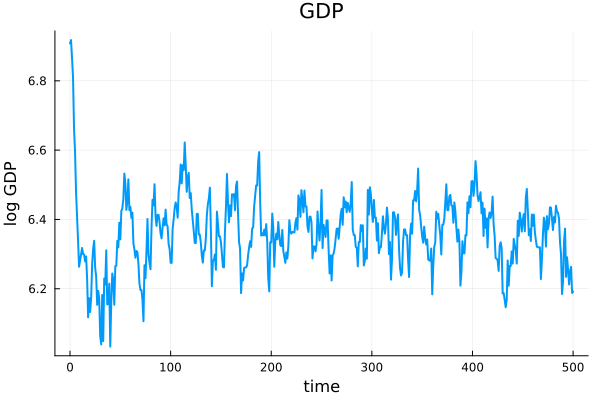

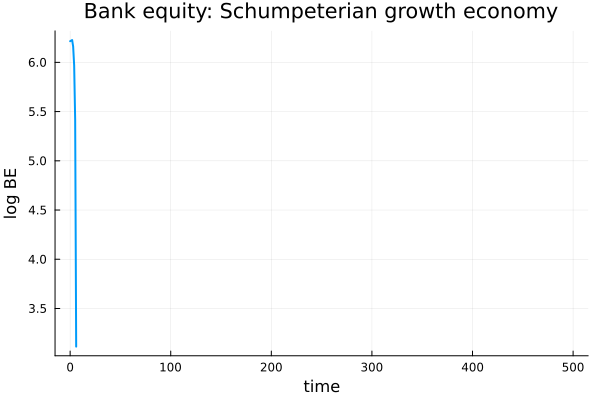

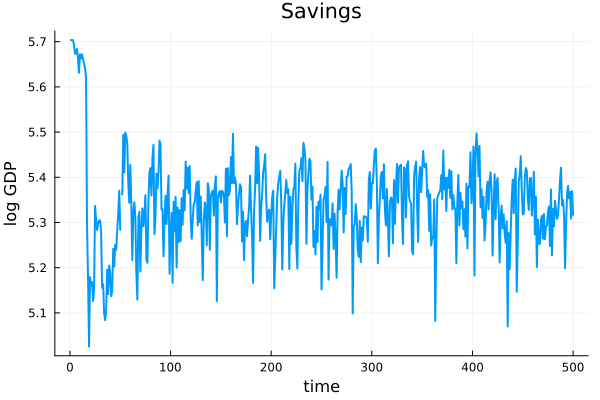

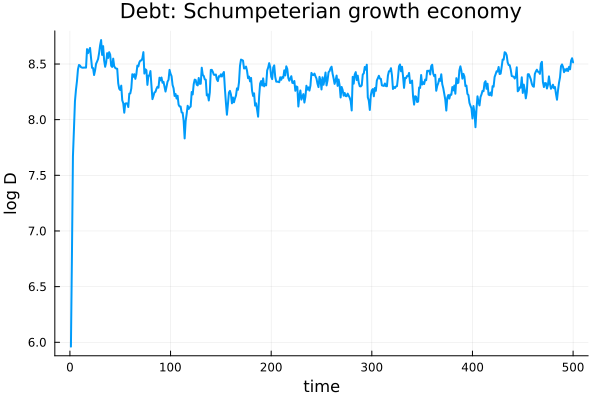

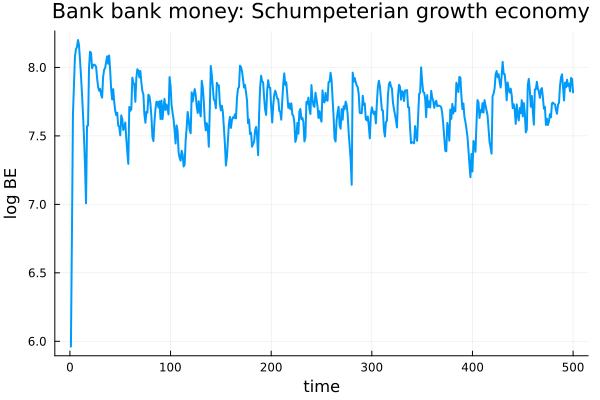

In [2]:
model1 = GrowthBanks.initialize_econ(;seed = 2)
GDP_series = []
E_series = []
D_series = []
B_series = []
banquity = []
dates = 0:500

@showprogress for t in dates

    GDP, Eq, D, B, bq = 0, 0, 0, 0, 0
    for agent in allagents(model1)
        if isa(agent, GrowthBanks.Firm)
            Q = agent.Q
            E = agent.E
            D += agent.D
            B += agent.B
            GDP += Q
            Eq += E
        else
            bqy = agent.capital
            bq += bqy
        end
    end
    push!(GDP_series, log(max(0, GDP)))
    push!(E_series, log(max(0, Eq)))
    push!(D_series, log(max(0, D)))
    push!(B_series, log(max(0, B)))
    push!(banquity, log(max(0, bq)))
    step!(model1)
end
GDP_series = convert(Vector{Float64}, GDP_series)
D_series = convert(Vector{Float64}, D_series)
B_series = convert(Vector{Float64}, B_series)
banquity = convert(Vector{Float64}, banquity)

p = plot(dates, GDP_series,
    title="GDP", xlabel="time", ylabel="log GDP", linewidth=2, legend=false, grid=true)

p2 = plot(dates, E_series,
    title="Savings", xlabel="time", ylabel="log GDP", linewidth=2, legend=false, grid=true)

p3 = plot(dates, D_series,
    title="Debt: Schumpeterian growth economy", xlabel="time", ylabel="log D", linewidth=2, legend=false, grid=true)

p4 = plot(dates, banquity,
    title="Bank equity: Schumpeterian growth economy", xlabel="time", ylabel="log BE", linewidth=2, legend=false, grid=true)
p5 = plot(dates, B_series,
    title="Bank bank money: Schumpeterian growth economy", xlabel="time", ylabel="log BE", linewidth=2, legend=false, grid=true)

# Display the plots
display(p)
display(p4)
display(p2)
display(p3)
display(p5)


In [3]:
ADFTest(GDP_series, :constant, 0)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.180747

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-10

Details:
    sample size in regression:          500
    number of lags:                     0
    ADF statistic:                      -7.63435
    Critical values at 1%, 5%, and 10%: [-3.44347 -2.86733 -2.56985]
